# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
# TODO: fill this in based on where you saved the training and testing data
import pickle

training_file = '..//..//..//data//traffic-signs-data//train.p'
testing_file = '..//..//..//data//traffic-signs-data//test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [594]:
def show_category(data, category, counts):
    first_img = []
    i = 1
    col = 5
    row = int(np.ceil(counts/col))
    plt.figure(figsize=(15,30))
    for k, group in groupby(enumerate(y_train), lambda pair: pair[1]):
        if k == category:
            for index, cat in group:
                plt.subplot(row, col, i)
                plt.imshow(data[index,:,:,:])
                plt.title("{0}".format(index))
                plt.axis('off')
                i += 1
                if i > counts:
                    break

    plt.show()

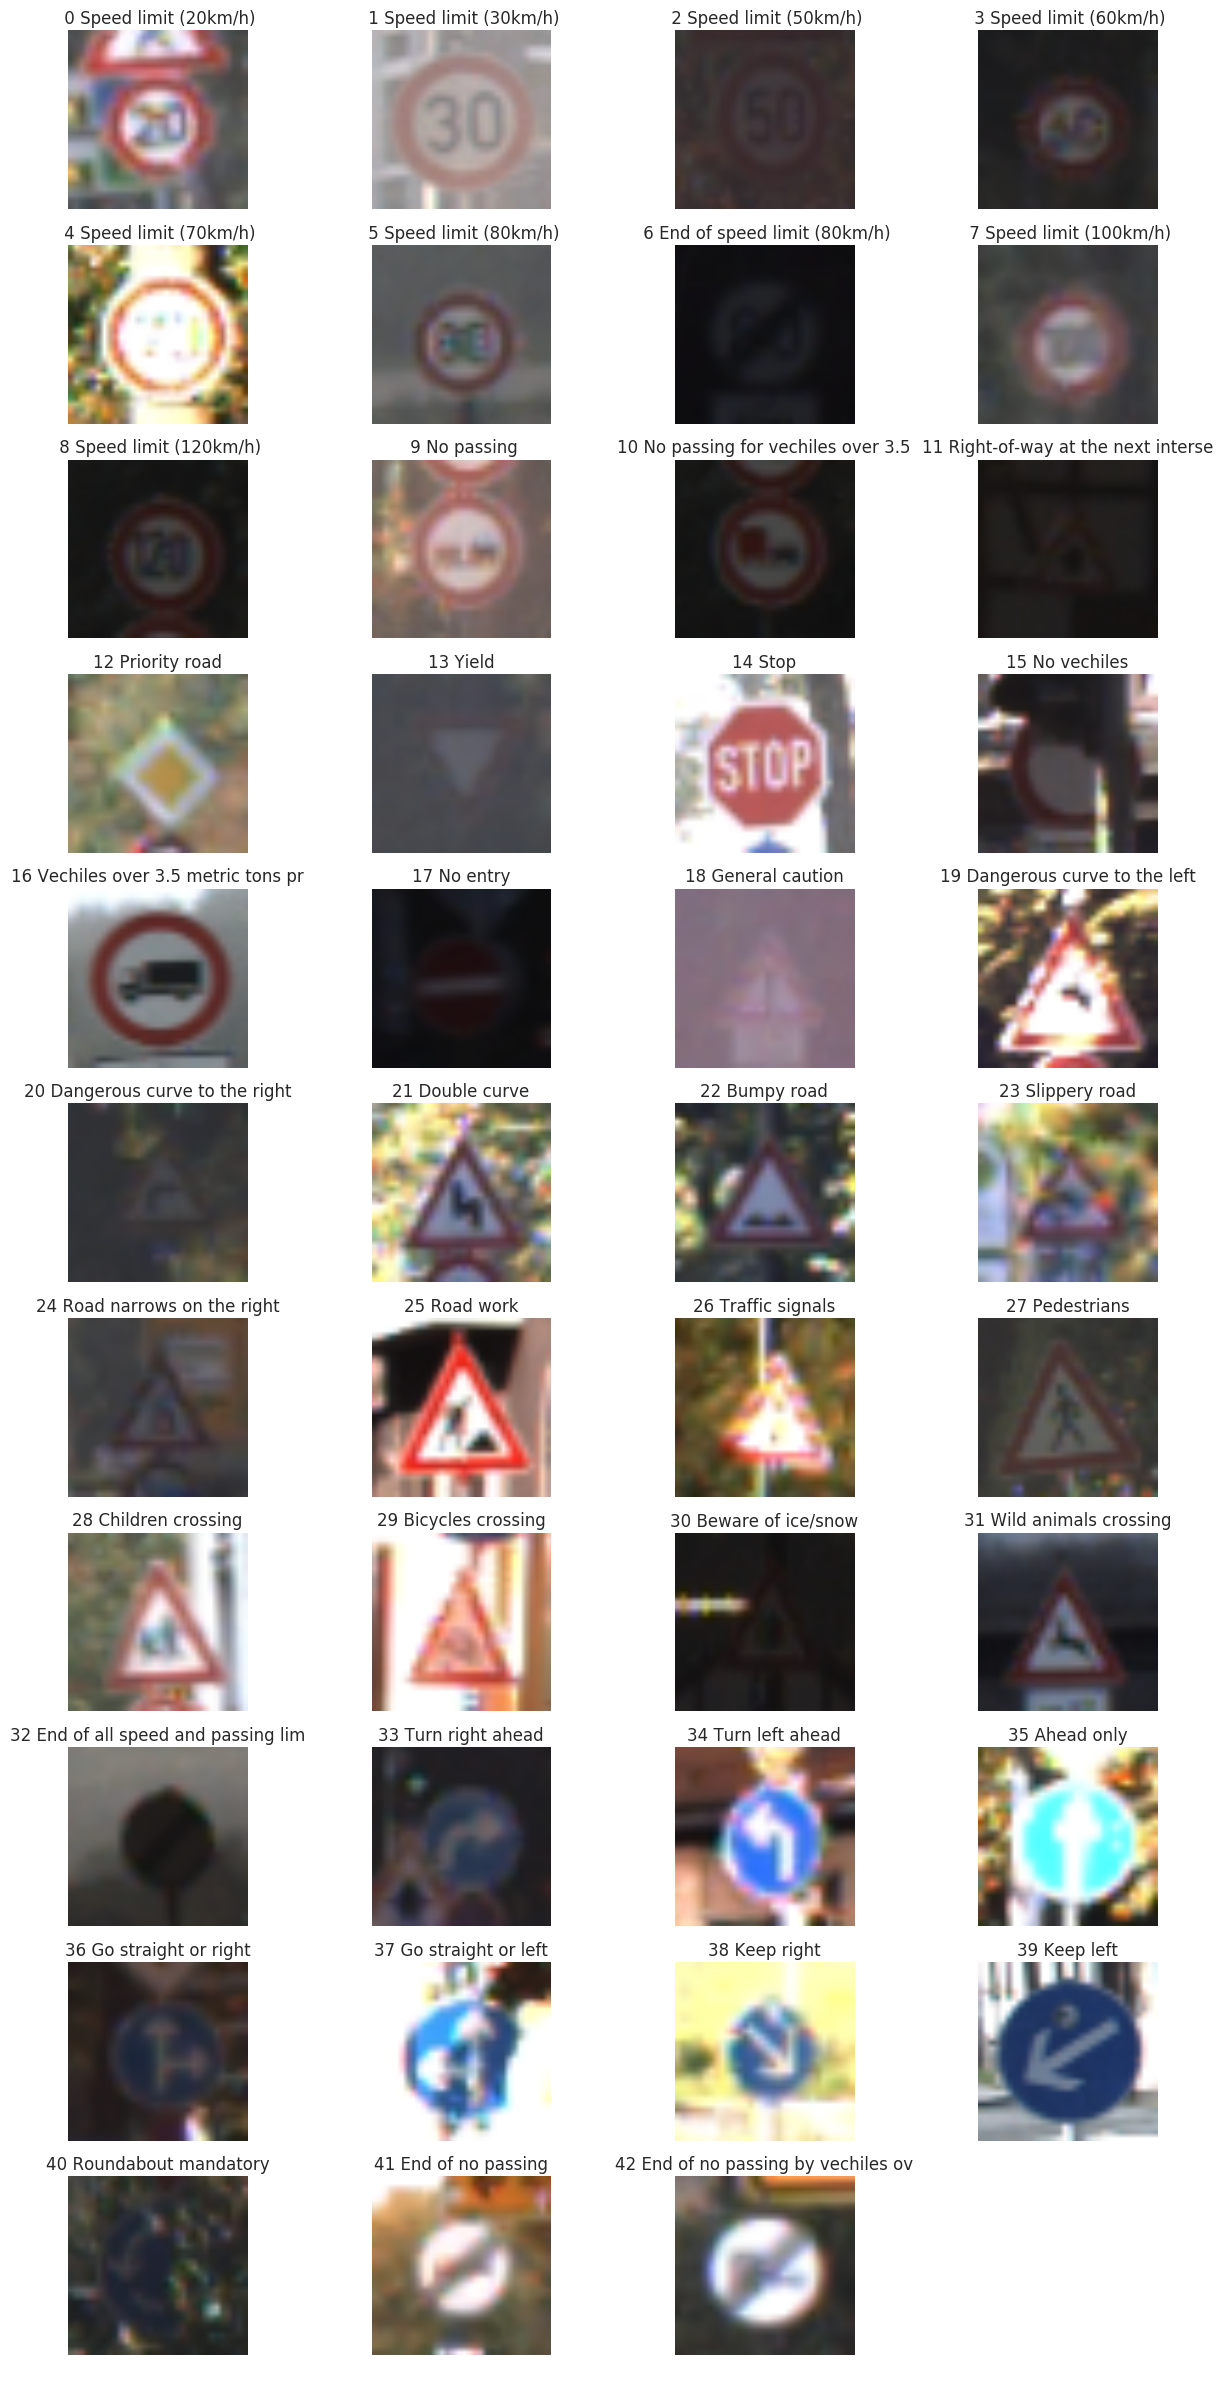

In [646]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby

sign_name_fn = './signnames.csv'
sign_names = np.array(pd.read_csv(sign_name_fn, delimiter=',', header=0))
sign_names = dict(sign_names)

def show_sample_by_group(data, label, signames):
    first_img = []
    for k, group in groupby(enumerate(label), lambda pair: pair[1]):
        first_img.append((k, list(group)[0][0]))
        #print(key, group)
        
    col = 4
    row = int(np.ceil(len(first_img) / col))
    plt.figure(figsize = (15, 30))
    
    for i, (k, j) in enumerate(first_img):
        plt.subplot(row, col, i+1)
        plt.axis('off')
        plt.title("{0:2d} {1:.32}".format(k, signames[k]))
        plt.imshow(data[j])

    plt.show()

show_sample_by_group(X_train, y_train, sign_names)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

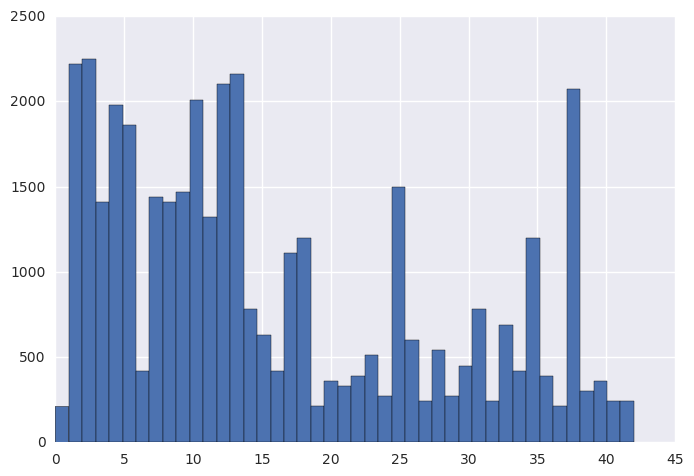

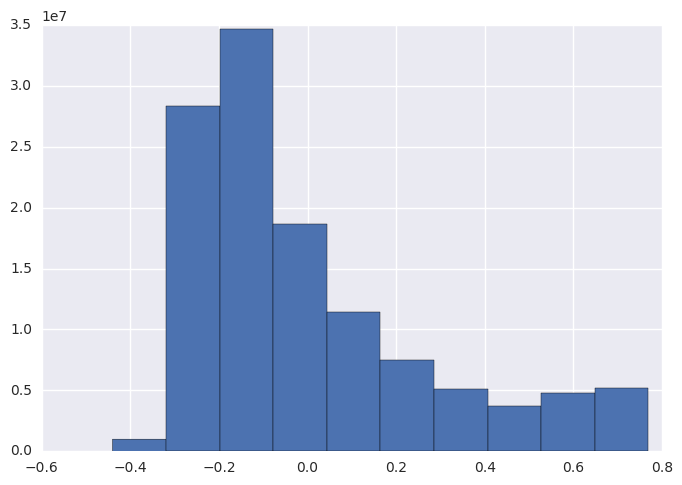

In [547]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np

def show_sample_distribution(label):
    plt.hist(label, bins=len(set(y_train)))
    plt.show()

show_sample_distribution(y_train)

#Generate fake data for fewer class
k_c_map = {}
for key, group in groupby(y_train):
    k_c_map[key] = len(list(group))

#Zero Center
n, w, h, c = X_train.shape
mean_image = np.mean(X_train, axis=0)
X_train_norm = X_train - mean_image
X_test_norm = X_test - mean_image

X_train_norm /= 255
X_test_norm /= 255

def preprocess(data):
    data -= mean_image
    data /= 255
    return data

plt.hist(X_train_norm.flatten())
plt.show()

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
1. Zero mean; Substract the mean of training image
2. Normalize: Divide by the maximum value (255) of training image

In [5]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
y_train_ohe = np.zeros([n_train, n_classes])
y_train_ohe[np.arange(n_train), y_train] = 1

y_test_ohe = np.zeros([n_test, n_classes])
y_test_ohe[np.arange(n_test), y_test] = 1

indices = list(range(n_train))
np.random.shuffle(indices)
n_train_t = int(0.8*n)
X_train_norm_t = X_train_norm[indices[:n_train_t]]
X_train_norm_v = X_train_norm[indices[n_train_t:]]

y_train_ohe_t = y_train_ohe[indices[:n_train_t]]
y_train_ohe_v = y_train_ohe[indices[n_train_t:]] 

y_train_t = y_train[indices[:n_train_t]]
y_train_v = y_train[indices[n_train_t:]]
### Feel free to use as many code cells as needed.
print("training data:", X_train_norm_t.shape)
print("validation data:", X_train_norm_v.shape)
print("test data:", X_test.shape)

num_train = X_train_norm_t.shape[0]
num_val = X_train_norm_v.shape[0]
num_test = X_test.shape[0]

training data: (31367, 32, 32, 3)
validation data: (7842, 32, 32, 3)
test data: (12630, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

1. Seperate training/validation data randomly by 80:20 from original training dataset
2. Keep original test dataset as test data
3. The original data is imbalance, maybe generate additional data on rarely class is value to try.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import numpy as np
import tensorflow.contrib.slim as slim

def DenseBlock(data, layer_i, bottleneck_layers):
    with tf.variable_scope("dense_w"+str(layer_i)):
        nodes = []
        a = slim.conv2d(data,64,[3,3],normalizer_fn=slim.batch_norm)
        nodes.append(a)
        for z in range(bottleneck_layers):
            b = slim.conv2d(tf.concat(3,nodes),64,[3,3],normalizer_fn=slim.batch_norm)
            nodes.append(b)
        return b

tf.reset_default_graph()

dense_layers = 25
dense_blocks = 5
bottleneck_layers = int(dense_layers / dense_blocks)

input_layer = tf.placeholder(shape=[None,32,32,3],dtype=tf.float32,name='input')
label_layer = tf.placeholder(shape=[None],dtype=tf.int32)
label_oh = slim.layers.one_hot_encoding(label_layer, n_classes)

layer1 = slim.conv2d(input_layer, 64,[3,3],normalizer_fn=slim.batch_norm,scope='w_'+str(0))
for i in range(dense_blocks):
    layer1 = DenseBlock(layer1, i, bottleneck_layers)
    layer1 = slim.conv2d(layer1, 64, [3,3], stride=[2,2], normalizer_fn=slim.batch_norm, scope='w_s_'+str(i))
    
top = slim.conv2d(layer1, n_classes, [3,3], normalizer_fn=slim.batch_norm,activation_fn=None,scope='w_top')
output = slim.layers.softmax(slim.layers.flatten(top))
loss = tf.reduce_mean(-tf.reduce_sum(label_oh * tf.log(output) + 1e-10, reduction_indices=[1]))


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I choice "DenseNet" architecture (https://arxiv.org/pdf/1608.06993v3.pdf) because it got the best performance than others (ex. VGG like) on validation dataset.
The DenseNet have 5 dense blocks, there are 5 layers within each dense block.
All convolution layers have batch normalization.


In [9]:
BATCH_SIZE = 64
EPOCHS = 200

def sample_indices(data, size):
    indices = list(range(data.shape[0]))
    np.random.shuffle(indices)
    return indices[:size]

trainer = tf.train.AdamOptimizer(learning_rate=0.001)
update = trainer.minimize(loss)

pred_correct = tf.equal(tf.argmax(output, 1), tf.argmax(label_oh, 1))
acc_op = tf.reduce_mean(tf.cast(pred_correct, tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    steps = num_train // BATCH_SIZE
    num_samples = steps * BATCH_SIZE    
    total_acc, total_loss = 0, 0
    saver = tf.train.Saver()
    for i in range(EPOCHS):
        for step in range(steps):
            indices = sample_indices(X_train, BATCH_SIZE)
            batch_x = X_train_norm[indices,:,:,:]
            batch_y = y_train[indices]
            #batch_y = y_train_t[indices]
            #print(batch_x.shape, batch_y.shape)
            loss_, acc_, _ = sess.run([loss, acc_op, update], feed_dict={input_layer: batch_x, label_layer: batch_y})
            if step % 100 == 0:
                print("epoch:{0}-step:{1}:loss:{2}, acc:{3}".format(i, step, loss_, acc_))    
        
        if i % 10 == 0:
            #print("epoch:{0}:loss_v:{1},acc_v:{2}".format(i, loss_v, acc_v))
            saver.save(sess, "model3.ckpt")


epoch:0-step:0:loss:4.154956817626953, acc:0.046875
epoch:0-step:100:loss:2.6544742584228516, acc:0.28125
epoch:0-step:200:loss:1.9725388288497925, acc:0.484375
epoch:0-step:300:loss:1.6187902688980103, acc:0.59375
epoch:0-step:400:loss:1.1927974224090576, acc:0.765625
epoch:1-step:0:loss:1.0967597961425781, acc:0.828125
epoch:1-step:100:loss:0.8642300367355347, acc:0.84375
epoch:1-step:200:loss:0.5915610194206238, acc:0.921875
epoch:1-step:300:loss:0.582996129989624, acc:0.96875
epoch:1-step:400:loss:0.5438264608383179, acc:0.9375
epoch:2-step:0:loss:0.5313405394554138, acc:0.921875
epoch:2-step:100:loss:0.6850073933601379, acc:0.9375
epoch:2-step:200:loss:0.36295777559280396, acc:0.96875
epoch:2-step:300:loss:0.3993617594242096, acc:0.984375
epoch:2-step:400:loss:0.3694796562194824, acc:1.0
epoch:3-step:0:loss:0.49878865480422974, acc:0.953125
epoch:3-step:100:loss:0.5064420700073242, acc:0.984375
epoch:3-step:200:loss:0.5009831786155701, acc:0.9375
epoch:3-step:300:loss:0.4575690627

In [740]:
def inference_batch(sess, input_data, label_data, index_from, index_end):
    batch_x = input_data[index_from:index_end]
    batch_y = label_data[index_from:index_end]    
    return  sess.run([pred_correct, output, loss, acc_op], feed_dict={input_layer: batch_x, label_layer: batch_y})    

def inference(input_data, label_data):
    BATCH_SIZE = 64
    result_total = []
    score_total = []
    loss_total = []
    acc_total = []

    with tf.Session() as sess:
        total_sample = label_data.shape[0]
        saver = tf.train.Saver()
        saver.restore(sess, save_path='/source/SDC_Andrew/SDC/T1/traffic-signs/model3.ckpt')

        steps = total_sample // BATCH_SIZE
        last_batch = total_sample - steps * BATCH_SIZE    

        for step in range(steps):
            result_t, score_t, loss_t, acc_t = inference_batch(sess, input_data, label_data, step*BATCH_SIZE, (step+1)*BATCH_SIZE)
            result_total.append(result_t)
            score_total.append(score_t)
            loss_total.append(loss_t)
            acc_total.append(acc_t)

        result_t, score_t, loss_t, acc_t = inference_batch(sess, input_data, label_data, steps*BATCH_SIZE, total_sample)
        result_total.append(result_t)
        score_total.append(score_t)
        loss_total.append(loss_t)
        acc_total.append(acc_t)
        
    return [ele for batch in result_total for ele in batch], [ele for batch in score_total for ele in batch], np.mean(loss_total), np.mean(acc_total)

result_test, score_test, loss_test, acc_test = inference(X_test_norm, y_test)

loss:0.3918231129646301, acc:0.9716841578483582


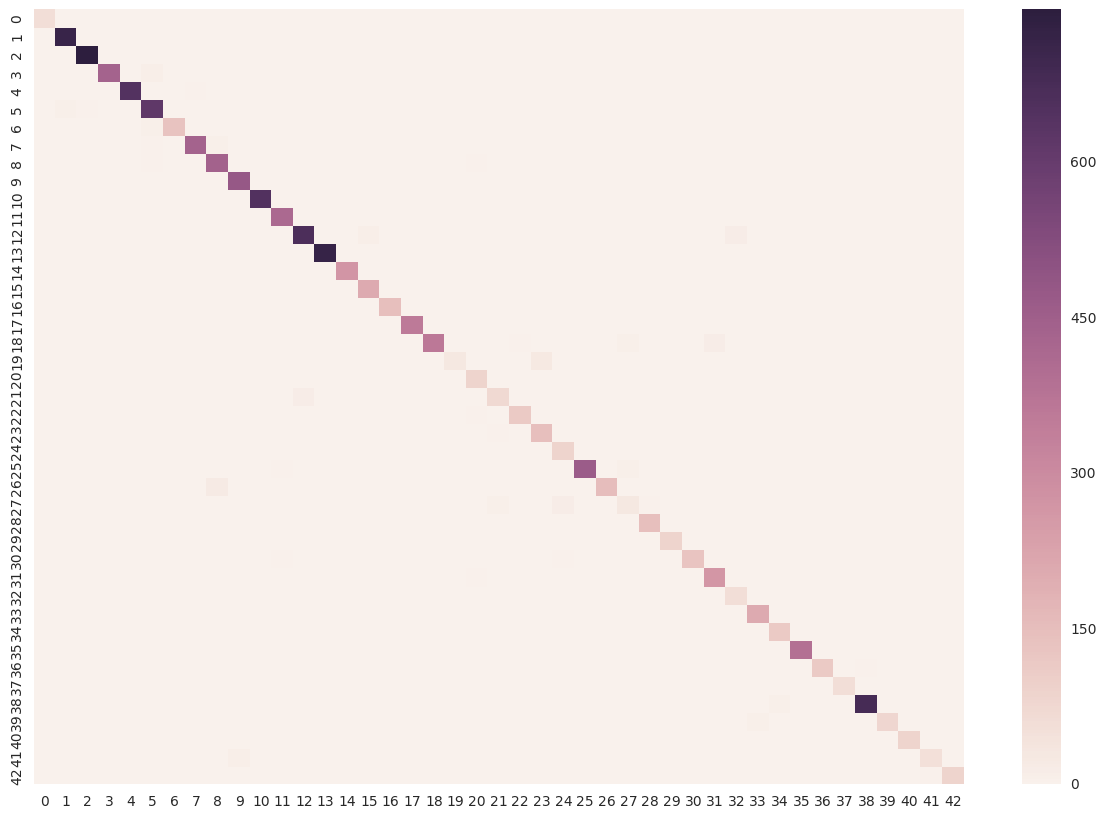

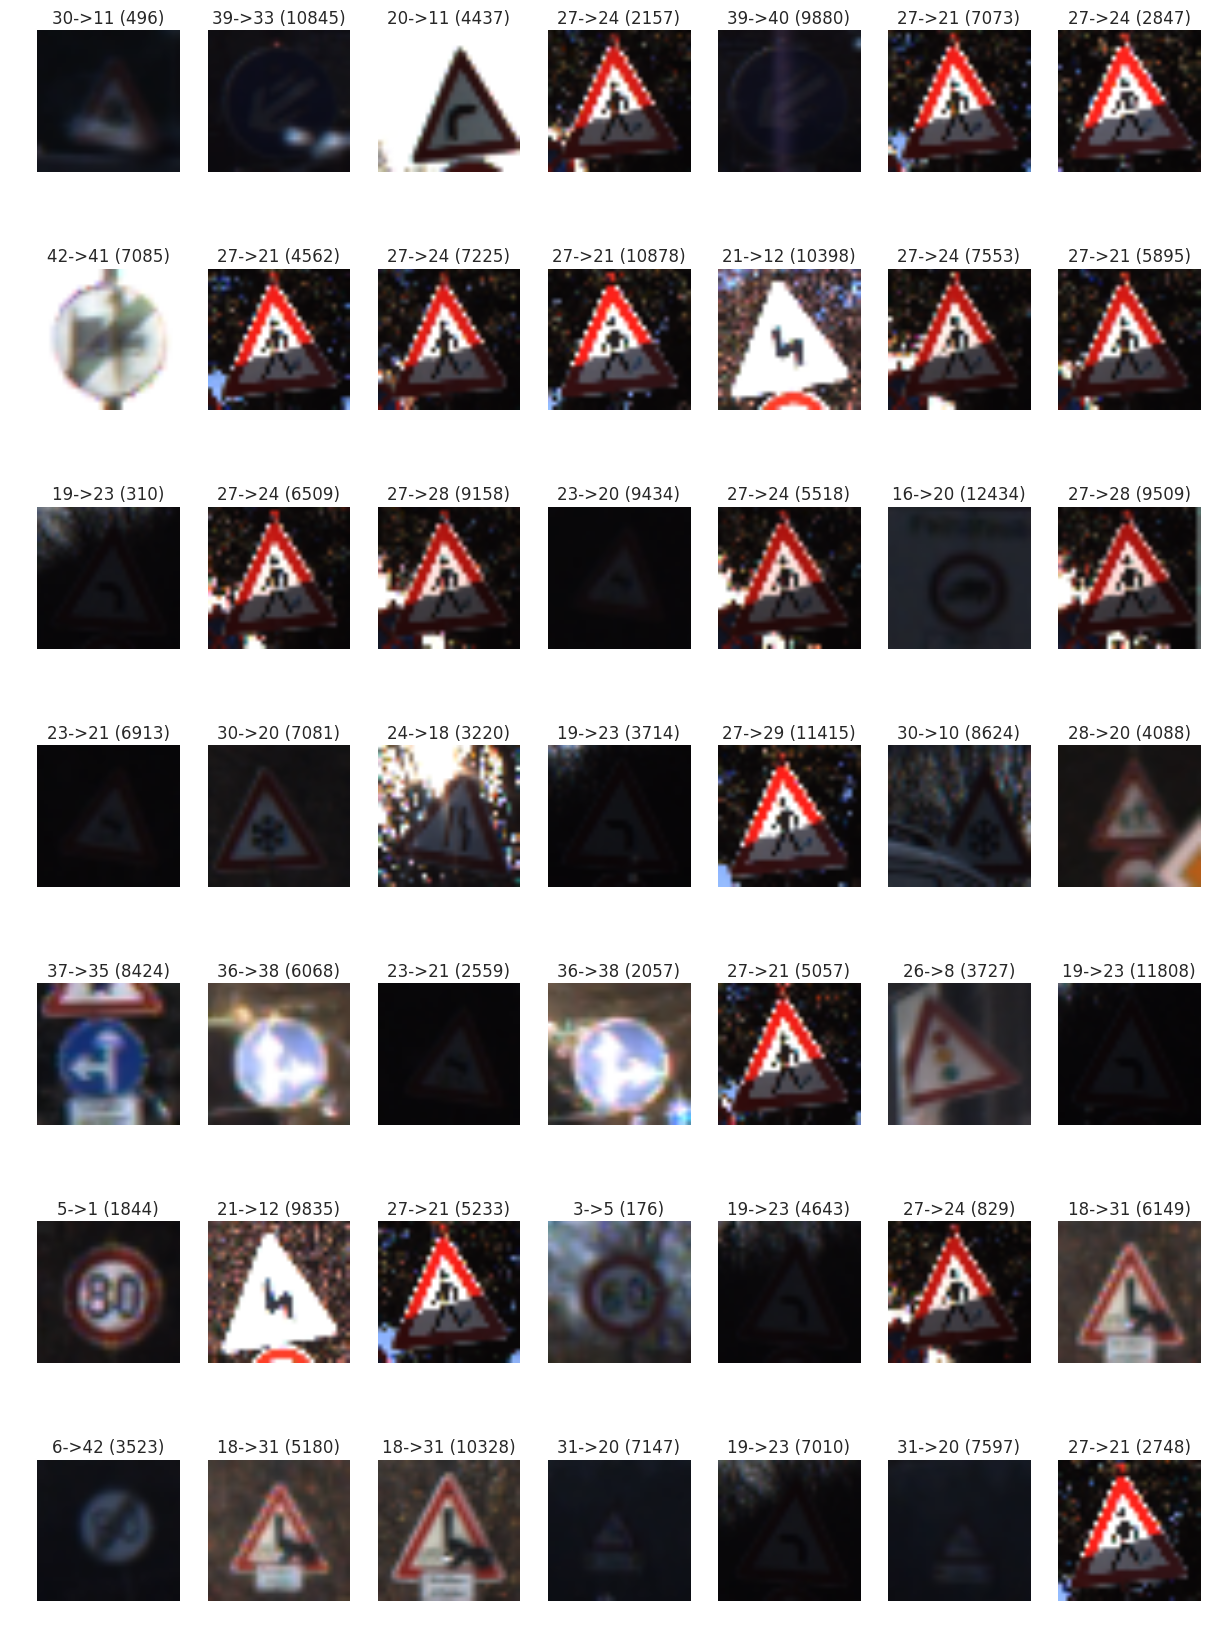

In [741]:
from sklearn.metrics import confusion_matrix
import seaborn
score_test = np.array(score_test)
print("loss:{0}, acc:{1}".format(loss_test, acc_test))
y_test_pred = np.argmax(score_test, axis=1)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize = (15,10))
seaborn.heatmap(cm)
plt.show()

#dump top 49 highest cost prediction
cost = list(enumerate(-np.log(score_test[range(y_test.shape[0]), y_test])))

def show_images(data, label, label_pred, cost, max_count = -1):
    if max_count == -1:
        counts = data.shape[0]
    else:
        counts = max_count
        
    col = 7
    row = int(np.ceil(counts / col))
    cost = cost[:counts]
    plt.figure(figsize = (15, 3*row))

    for i, (j, c) in enumerate(cost):
        r = int(i/col)
        c = i - col*r
        plt.subplot(col, row, i+1)
        plt.axis('off')
        index = j
        plt.imshow(data[index, :, :])
        plt.title("{0}->{1} ({2})".format(label[index], label_pred[index], index))
        
    plt.show()

cost_test_wrong = list(filter(lambda pair: y_test_pred[pair[0]] != y_test[pair[0]], cost))
cost_test_wrong.sort(key = lambda pair: pair[1], reverse = True)
show_images(X_test, y_test, y_test_pred, cost_test_wrong, 49)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used AdamOptimizer with learning_rate=0.001.
Batch size is 64 and the epochs is 200

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
DenseNet has L-l subsequence layers with CNN then following by composition function (Batch Normalization, ReLU) and Pooling. Due to the memory limition, the training procedure will apply SGD, randomly select 64 (batch size) samples from training data to train the model by gradient decent. I adopt the 0.001 learning rate. Object function is minimizing loss function that is cross entropy of the output layer (softmax). The architecture could achieve 100% accuracy on training set. (loss: 0.2~0.3) Becuase DenseNet & AdamOptimizer is quite good, I only select learning rate from (0.001, 0.0005) by validation data set. The final result seems very similar but 0.001 is faster to converge.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [737]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import misc
import os

#most samples are collected from:
#http://www.gettingaroundgermany.info/zeichen.shtml

test_dir = './test_sample'

def load_new_images(img_dir, sign_names):
    new_images = []
    new_labels = []

    for root, dirs, files in os.walk(img_dir):
        for i, fn in enumerate(files):
            fp = os.path.join(root, fn)
            img = misc.imread(fp)
            label = int(os.path.splitext(fn)[0])
            new_labels.append(label)
            img = misc.imresize(img, image_shape)
            new_images.append(img)

    return new_images, new_labels

new_images, new_labels = load_new_images(test_dir, sign_names)
new_images = np.array(new_images)
new_labels = np.array(new_labels)

result_new, score_new, loss_new, acc_new = inference(preprocess(new_images.astype(np.float64)), new_labels)

In [738]:
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

def show_images_with_prop(images, labels, signames, results, scores):
    col = 4
    row = int(np.ceil(images.shape[0] / col))
    plt.figure(figsize=(15, 4*row))
    
    for i in range(images.shape[0]):
        s = list(enumerate(scores[i]))
        s.sort(key = lambda pair:pair[1], reverse=True)
        r = i//(col)
        c = i%col+1

        i1 = r*col*2+c
        i2 = r*col*2+c+col

        img = images[i,:,:,:]
        plt.subplot(row*2, col, i1)
        plt.axis('off')
        plt.title("{0:2d} {1}".format(labels[i], signames[labels[i]]))
        plt.imshow(img)

        plt.subplot(row*2, col, i2)
        #plt.xlabel("confidence")
        #plt.ylabel("category")
        prop = [p for i,p in s]
        cat = [i for i,p in s]
        plt.title("{0:2d} {1}".format(s[0][0], signames[s[0][0]]))
        plt.barh(cat, prop)

    plt.tight_layout()
    plt.show()

print("loss: {0}, acc: {1}".format(loss_new, acc_new))

loss: 0.154750257730484, acc: 1.0


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In new captured data set, because all the samples are good quality, the accuracy is 100%, no diffcult to classify.
In test data set, the following images are diffcult to be cliassificated:
496, 10845, 9880, 310, 9434

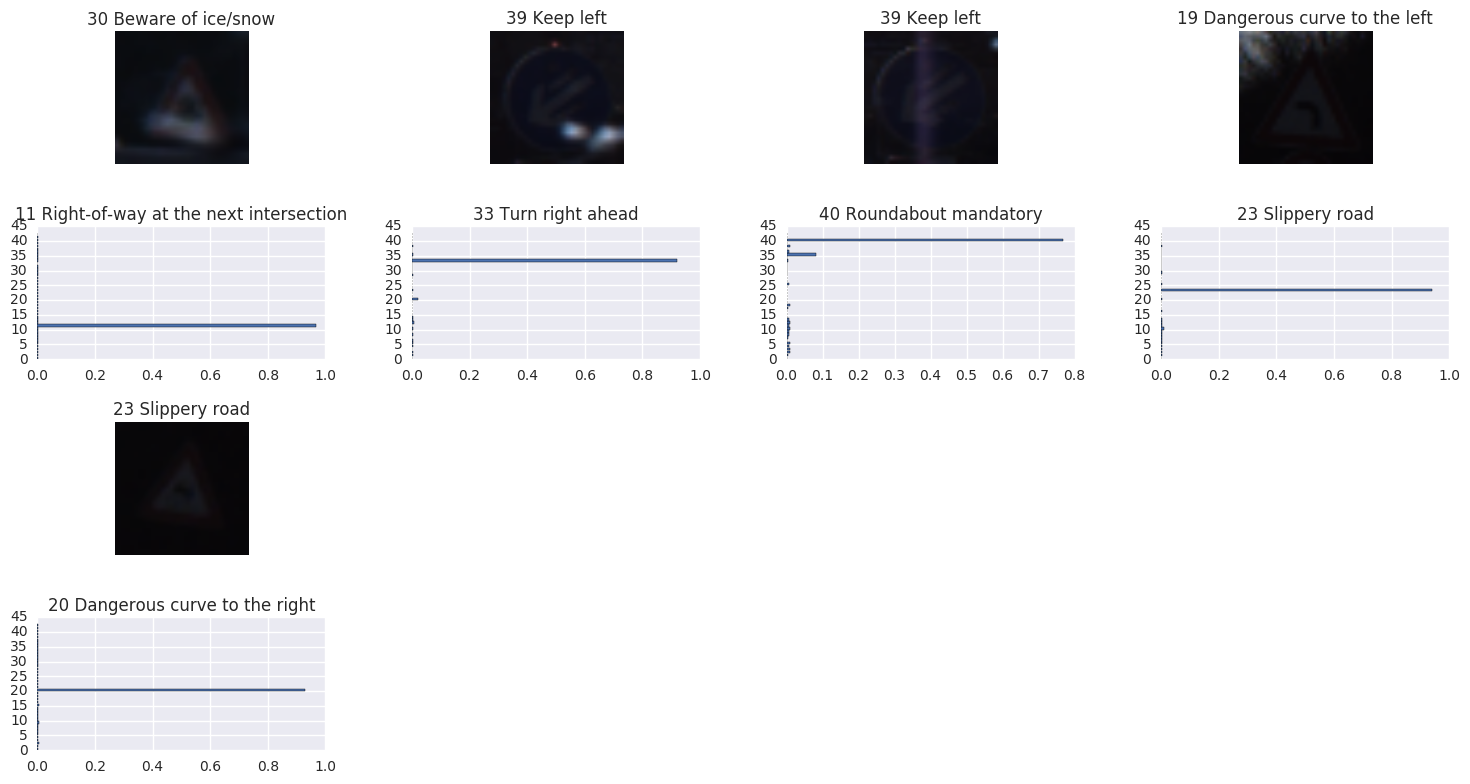

In [706]:
diffcult_index = [496, 10845, 9880, 310, 9434]
diffcult_images = X_test[diffcult_test_sample_index]
diffcult_labels = y_test[diffcult_test_sample_index]
diffcult_result = np.array(result_test)[diffcult_test_sample_index]
diffcult_score = score_test[diffcult_test_sample_index]
show_images_with_prop(diffcult_images, diffcult_labels, sign_names, diffcult_result, diffcult_score)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset?_


**Answer:**
Yes, my model is able to perform equally well on captured pictures (100% )as the test dataset (97%). 

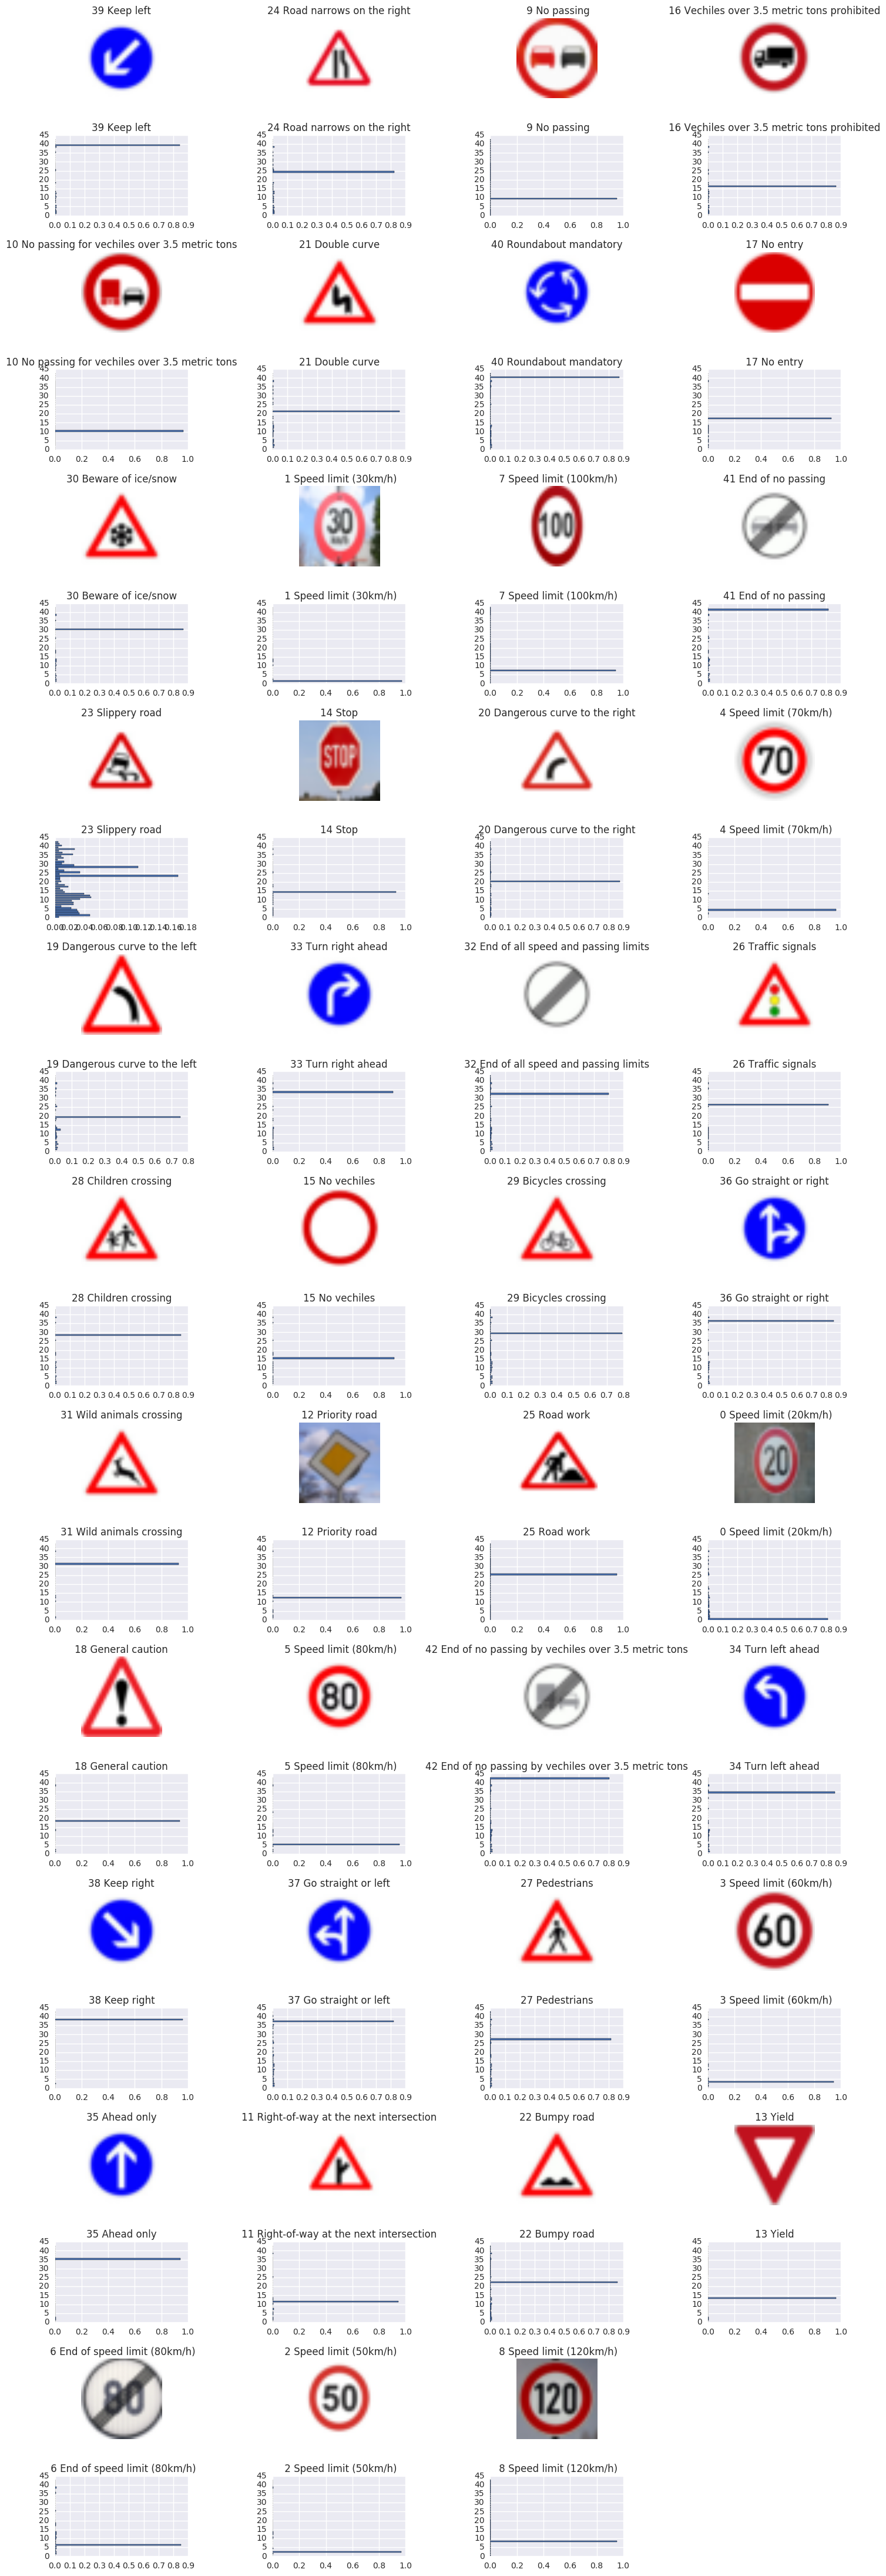

In [707]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
show_images_with_prop(new_images, new_labels, sign_names, result_new, score_new)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
In new captured data set, the accuracy is 100%, except "Slippery road" (23), all predictions are certain and correct.
In test data set, the worstest prediction (larger loss) is very confident but wrong. On the other hand, in best wrong predictions (smaller loss), almost the second confident one is the correct answer.
All top-5 prediction in the wrong cases are printed at the following.
Following by visualization for the wrong predictions on test data set.

In [756]:
cost_test_wrong.sort(key = lambda pair: pair[1], reverse = False)

for i, c in cost_test_wrong:
    score_ = list(enumerate(score_test[i]))
    score_.sort(key = lambda pair: pair[1], reverse = True)
    msg = "{0:5} {1:3} -> ".format(i, y_test[i])
    for j in range(5):
        msg += "{0:3} ({1:.2f})".format(score_[j][0], score_[j][1])
    print(msg)

12276  42 ->  41 (0.49) 42 (0.46)  3 (0.01) 38 (0.00)  6 (0.00)
 1560  42 ->  41 (0.58) 42 (0.34) 18 (0.01) 12 (0.01)  7 (0.00)
12105  19 ->  21 (0.59) 19 (0.34) 17 (0.01) 23 (0.01) 12 (0.01)
 4732  19 ->  23 (0.62) 19 (0.33)  8 (0.01) 34 (0.00)  2 (0.00)
 5972  38 ->  34 (0.60) 38 (0.31) 13 (0.01) 18 (0.01) 12 (0.01)
 1307  19 ->  23 (0.42) 19 (0.31)  2 (0.02)  1 (0.02) 10 (0.02)
 6210  19 ->  23 (0.35) 19 (0.30)  2 (0.03) 13 (0.02)  1 (0.02)
 3591   7 ->   5 (0.34)  7 (0.28)  4 (0.04)  2 (0.02)  1 (0.02)
 6183  38 ->  34 (0.63) 38 (0.25) 11 (0.03)  1 (0.01) 42 (0.01)
10135   3 ->   5 (0.62)  3 (0.25) 18 (0.01) 13 (0.01)  2 (0.01)
 2191   5 ->   2 (0.47)  5 (0.22) 13 (0.03) 38 (0.02)  1 (0.02)
 6766  18 ->  31 (0.50) 18 (0.18)  1 (0.03)  2 (0.02) 13 (0.02)
 7886  18 ->  22 (0.25) 18 (0.18) 13 (0.04)  2 (0.04) 10 (0.04)
 8821  42 ->  41 (0.58) 42 (0.17) 38 (0.02)  2 (0.02) 12 (0.02)
 2924   5 ->   1 (0.55)  5 (0.16)  2 (0.02) 13 (0.02) 12 (0.02)
 8736   5 ->  20 (0.53)  5 (0.15) 10 (0.

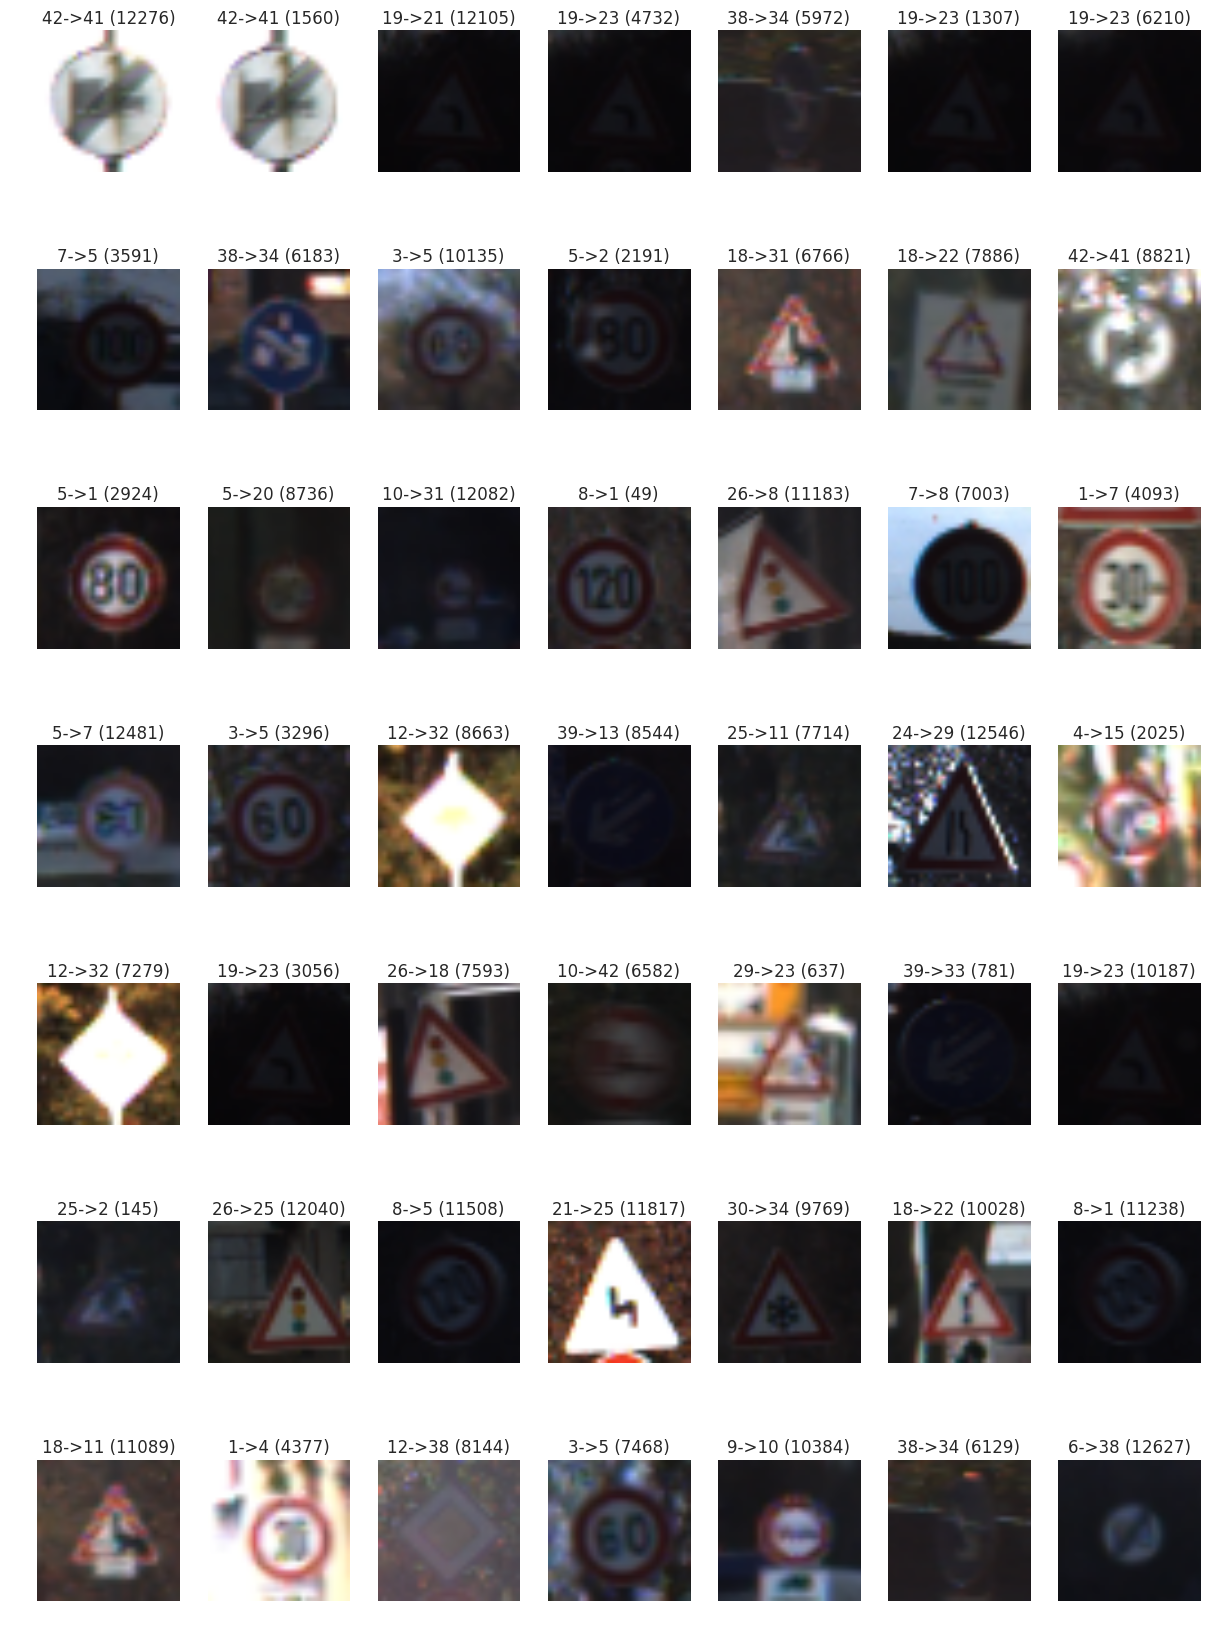

In [757]:
show_images(X_test, y_test, y_test_pred, cost_test_wrong, 49)

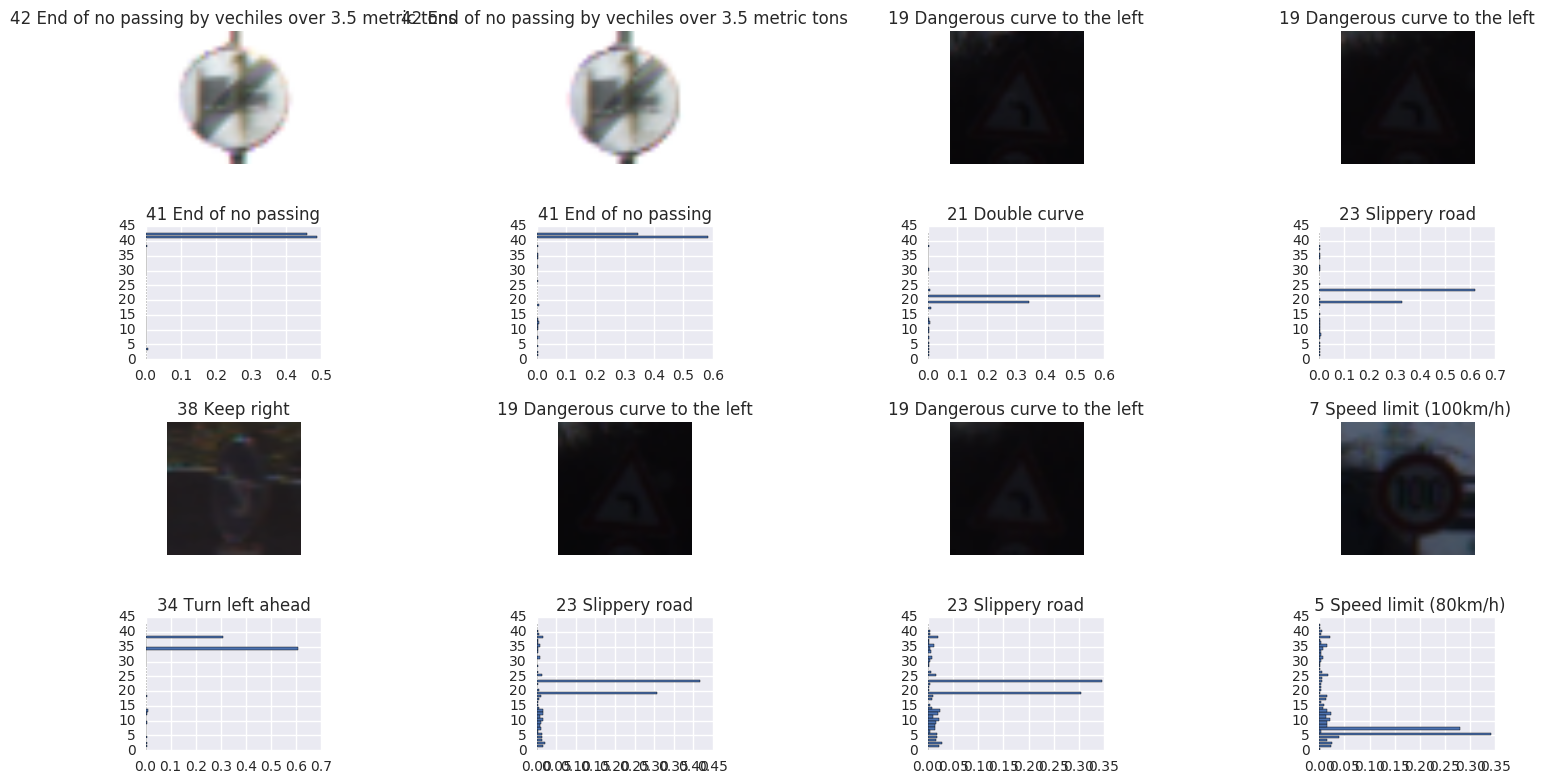

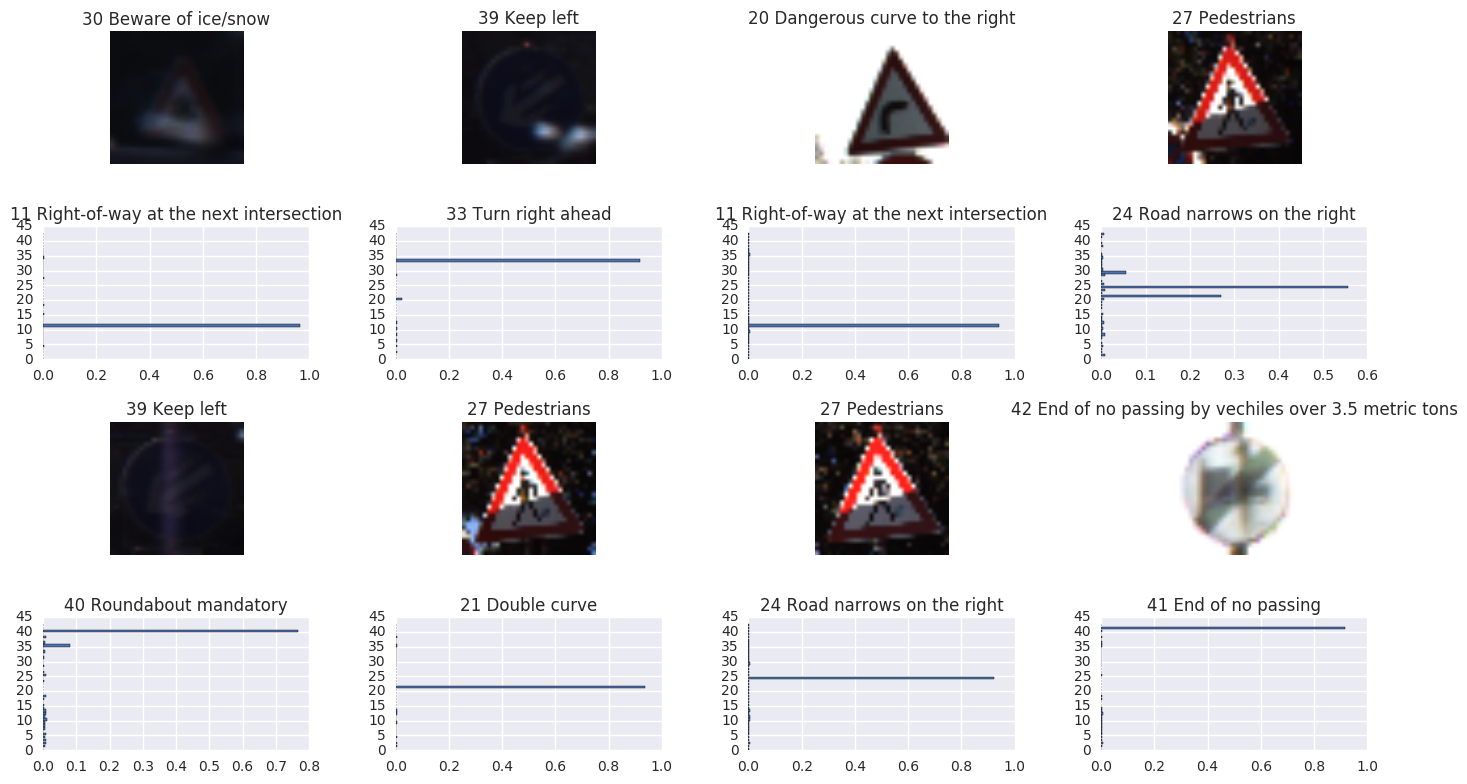

In [759]:
def show_low_cost_wrong_samples(data, label, sign_names, cost, result, score):
    index = [pair[0] for pair in cost[:8]]
    images_ = data[index]
    labels_ = label[index]
    result_ = np.array(result)[index]
    score_ = score[index]
    show_images_with_prop(images_, labels_, sign_names, result_, score_)
    
show_low_cost_wrong_samples(X_test, y_test, sign_names, cost_test_wrong, result_test, score_test)

cost_test_wrong.sort(key = lambda pair: pair[1], reverse = True)
show_low_cost_wrong_samples(X_test, y_test, sign_names, cost_test_wrong, result_test, score_test)

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
inference(preprocessed_images, labels)

Parameters:
    preprocessed_images: numpy.ndarray with dimension as: [num, height, width, channels]
        preprocessed_images should be the data be processed by preprocess()
        That will zero mean and normalize the images that will be able to inferenced by trainned model.
    labels: numpy.ndarray of integers
        Array of label
        
Return:
    result: Array of boolean to represent the prediction result
    score: Array of propability (softmax) for all predictions, the dimension is: [num, categories]
    loss: The loss of prediction. 
    accuracy: The accuracy of prediction.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.